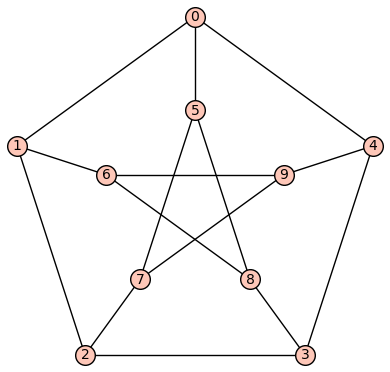

In [2]:
G = graphs.PetersenGraph()
G.show()
